# Commercial Vehicles Sensor Data Exploratory Data Analysis

## Import Necessary Libraries

In [1]:
## Import necessary libraries
from urllib.parse import quote

## Import necessary API
import sys
sys.path.append('../../../../')
from api.v2.util.data_load import data_load
from api.v2.util.get_tag_name import show_column
from api.v2.eda.Data_Info import Data_Info
from api.v2.eda.Statistical_test import adf_test, kpss_test, pp_test, ljung_box_test, arch_test, vif_test
from api.v2.eda.Visualize_EDA import Visualize_EDA

## Set Commercial Vehicles Sensor Data Base Parameter

In [2]:
# Set Commercial Vehicles Sensor Data Base Parameter

# Set MachBase Neo URL address
URL = 'http://127.0.0.1:5654'
# Set Tag Table Name
table = 'commercial_vehicles'
# Set TimeFormat - > 'default' or '2006-01-02 15:04:05.000000'(Divided down to the nanosecond)
timeformat = '2006-01-02 15:04:05.000000'
# Set resample Option -> D(day), H(hour), T(minute), S(second)
resample_freq = None

## Check Commercial Vehicles Sensor Data Info

In [3]:
# Print Commercial Vehicles Sensor DataInfo
Data_Info(URL, table, timeformat, resample_freq)

Tag List: ['gFx', 'gFy', 'gFz', 'label', 'speed', 'wx', 'wy', 'wz']
--------------------------------------------
Number of data: 1699983
--------------------------------------------
Start Time: 2025-01-01 00:00:00
End Time: 2025-01-01 04:43:19.832029
--------------------------------------------
Missing Values: 0
--------------------------------------------
Smallest time interval: 0.01 seconds
Largest time interval: 0.01 seconds
--------------------------------------------
Maximum sampling rate (per second): 100.01000100010002 Hz
--------------------------------------------


## Set Commercial Vehicles Sensor Data Extra Parmeter
* Set based on the information confirmed in the previous step

In [4]:
# Set the desired tag names
tags = show_column(URL, table)
# Wrap each item in the list with single quotes and separate with commas
tags_ = ",".join(f"'{tag}'" for tag in tags)
# Set Tag Name
name = quote(tags_, safe=":/")
# Set Start time
start_time = '2025-01-01 00:00:00'
# Set End time 
end_time = '2025-01-01 04:44:00'
# Set TimeFormat - > 'default' or quote('2006-01-02 15:04:05.000000')(Divided down to the nanosecond)
timeformat = quote('2006-01-02 15:04:05.000000')

In [5]:
# Commercial Vehicles Sensor Data Load
df = data_load(URL, table, name, start_time, end_time, timeformat, resample_freq)

In [6]:
df

NAME,gFx,gFy,gFz,label,speed,wx,wy,wz
TIME,,,,,,,,
2025-01-01 00:00:00.000000,-0.272700,0.044200,0.938200,1.0,0.000000,-0.0053,-0.0077,-0.0331
2025-01-01 00:00:00.009999,-0.272700,0.044200,0.938200,1.0,0.000000,-0.0053,-0.0077,-0.0331
2025-01-01 00:00:00.020000,-0.289500,0.046200,0.993400,1.0,0.000000,-0.0010,0.0070,-0.0312
2025-01-01 00:00:00.029999,-0.289500,0.046200,0.993400,1.0,0.000000,-0.0010,0.0070,-0.0312
2025-01-01 00:00:00.040000,-0.289500,0.046200,0.993400,1.0,0.000000,-0.0010,0.0070,-0.0312
...,...,...,...,...,...,...,...,...
2025-01-01 04:43:19.792028,-0.236300,0.020500,0.950400,2.0,3.246584,0.0223,0.0100,0.0157
2025-01-01 04:43:19.802028,-0.236300,0.020500,0.950400,2.0,3.246584,0.0223,0.0100,0.0157
2025-01-01 04:43:19.812028,-0.241854,-0.017826,0.966228,2.0,3.246584,0.0144,0.0216,0.0157


## Check Visualize_EDA

Start Visualize All Method
Removed NaN Columns: set()


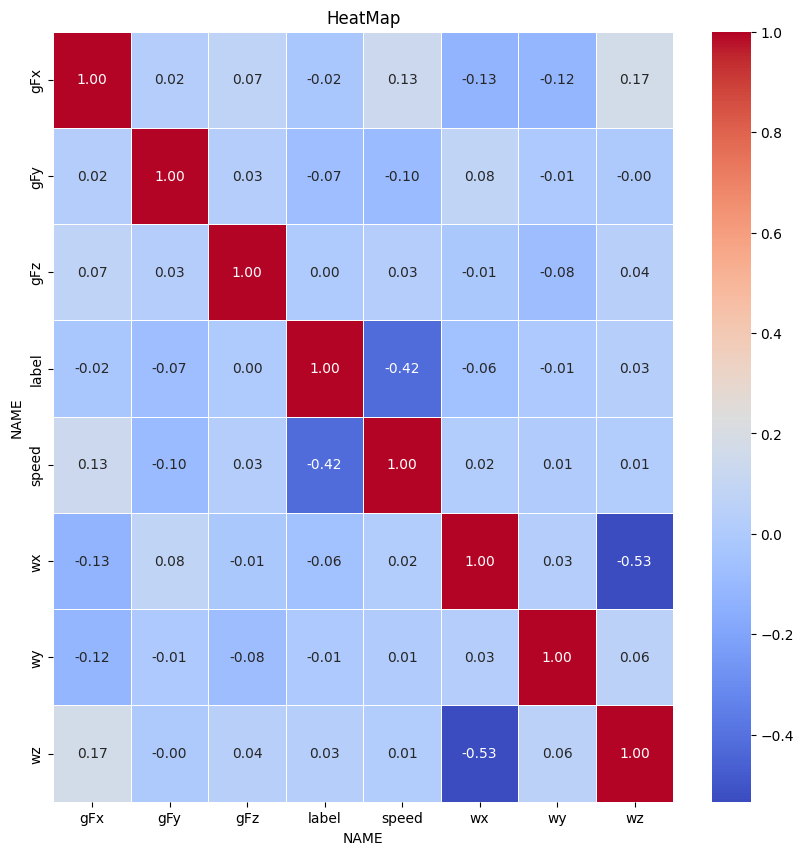

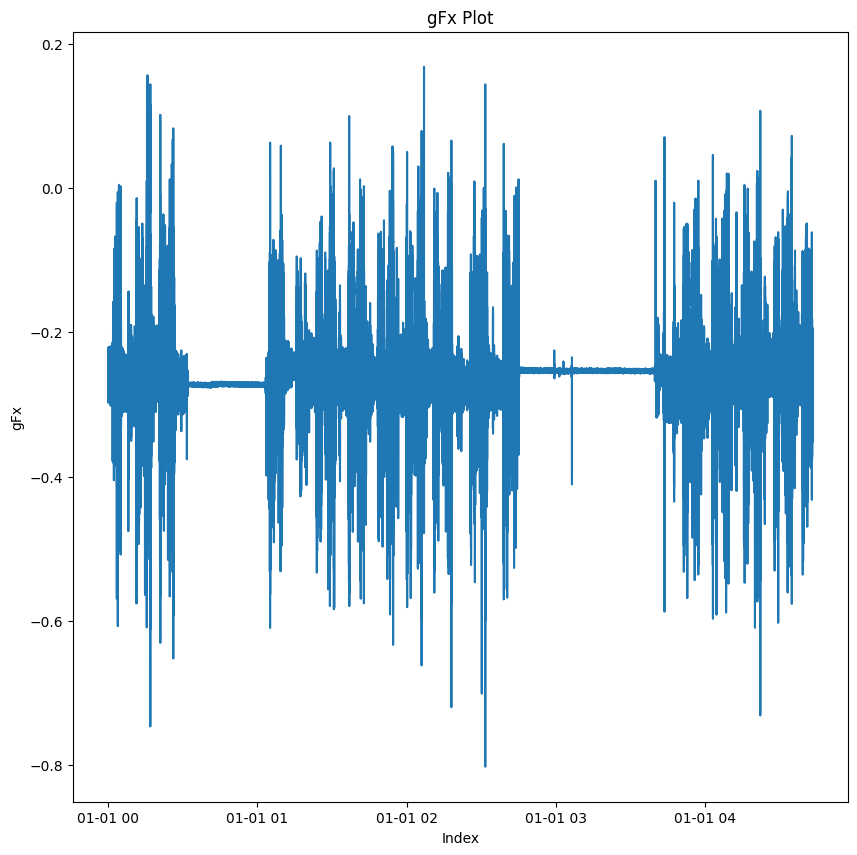

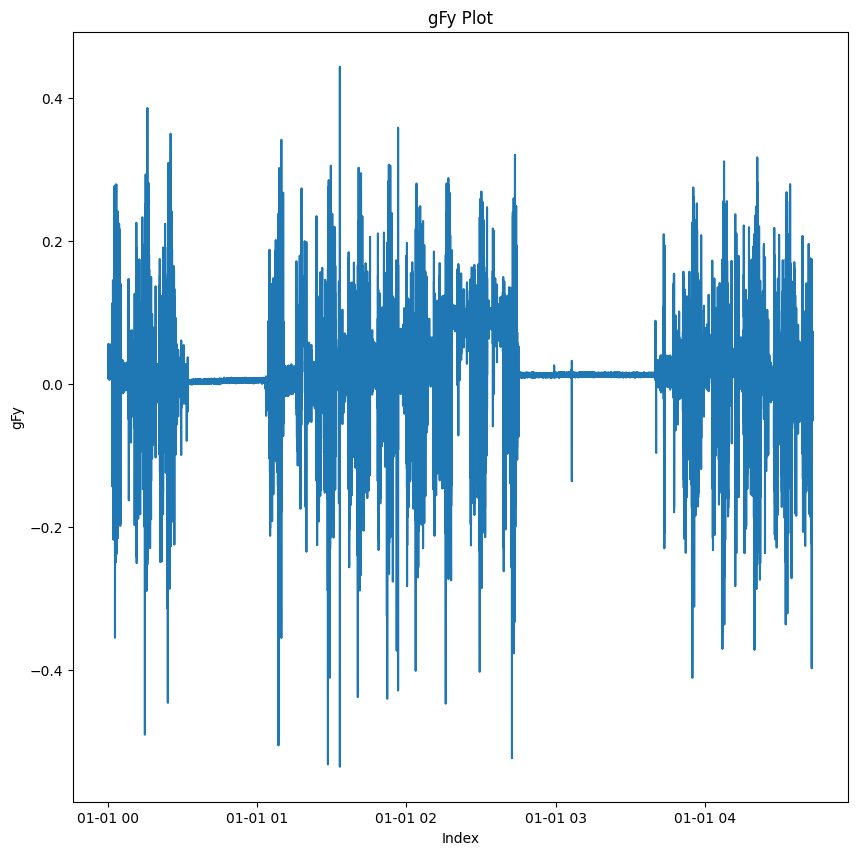

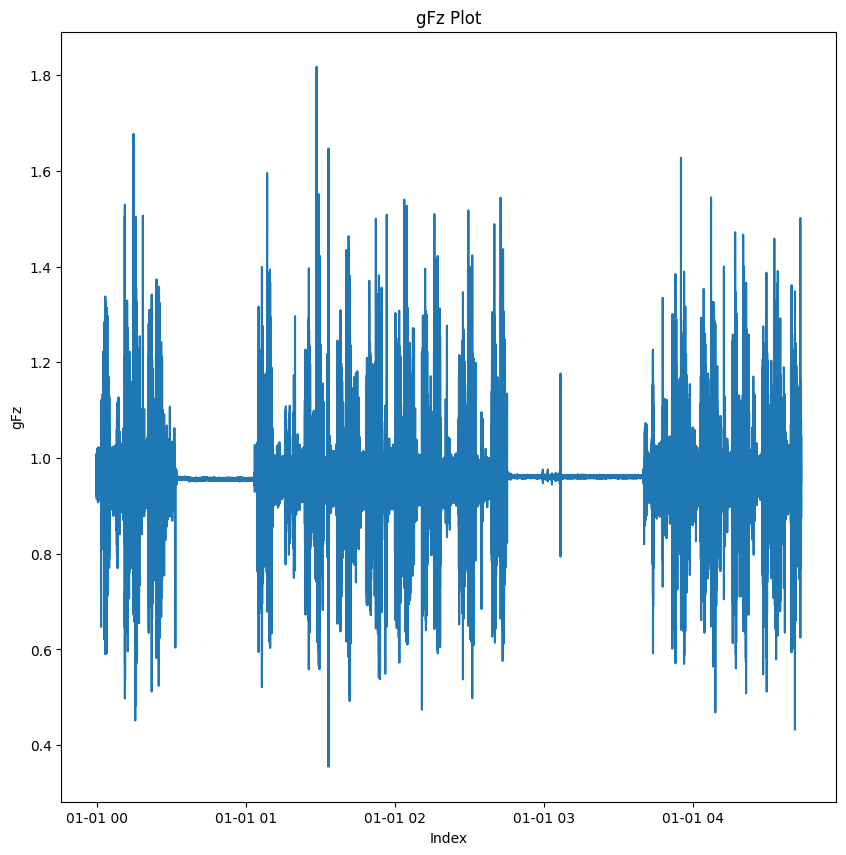

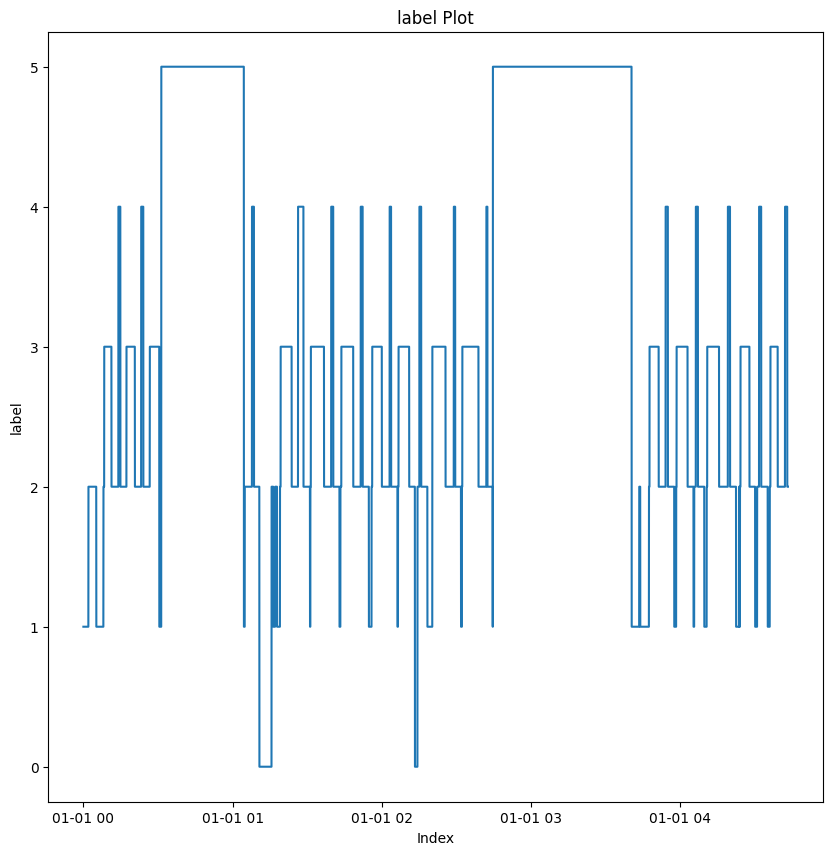

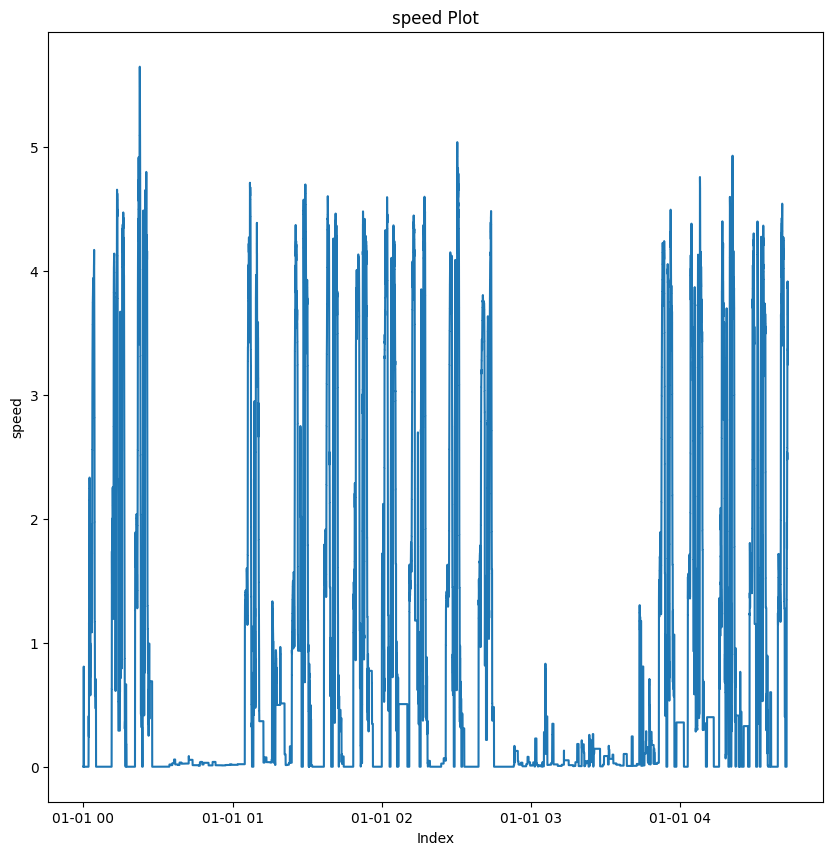

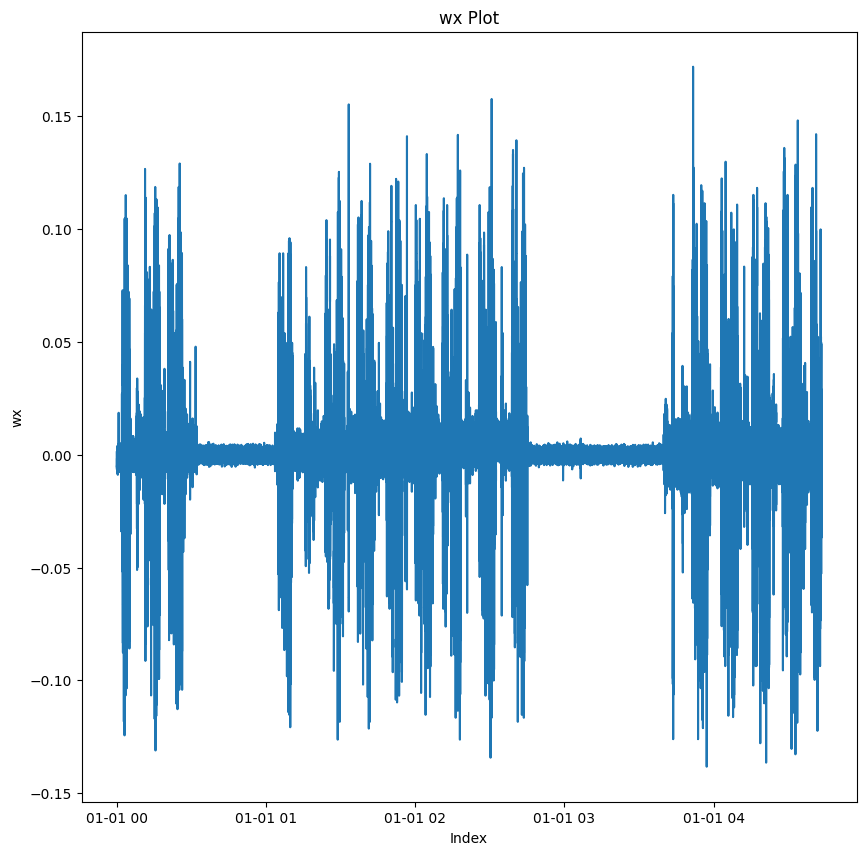

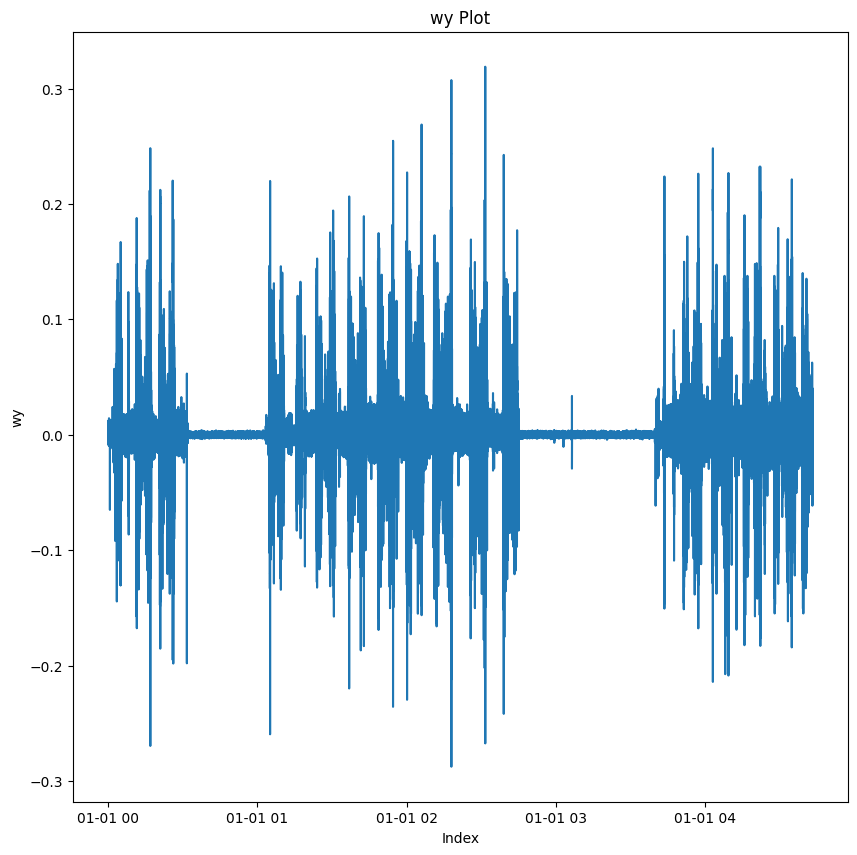

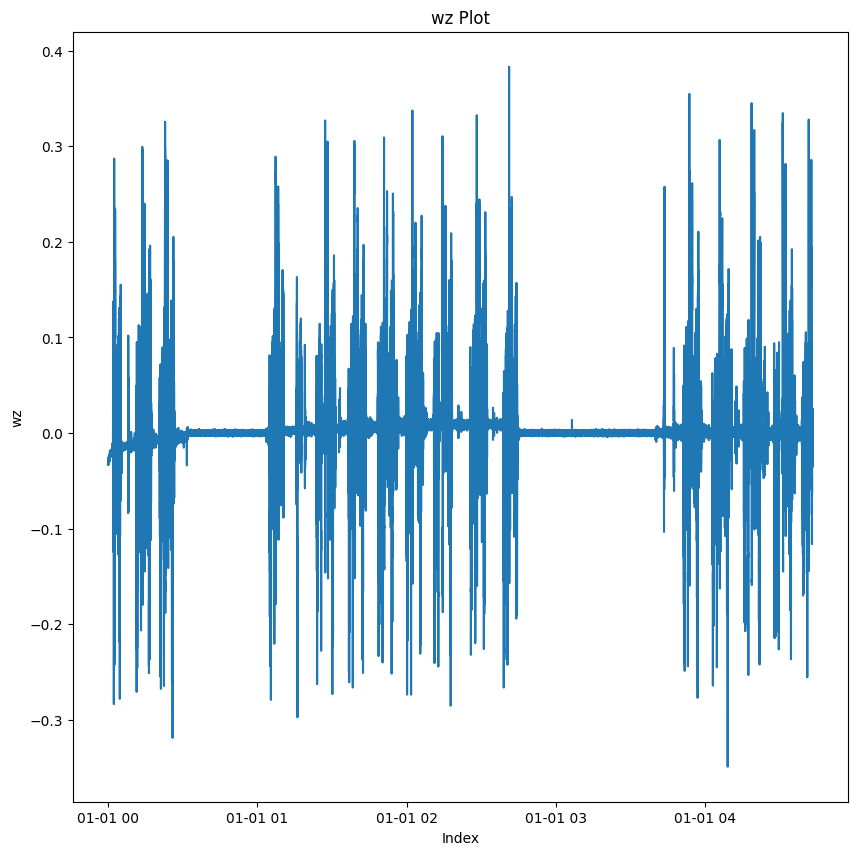

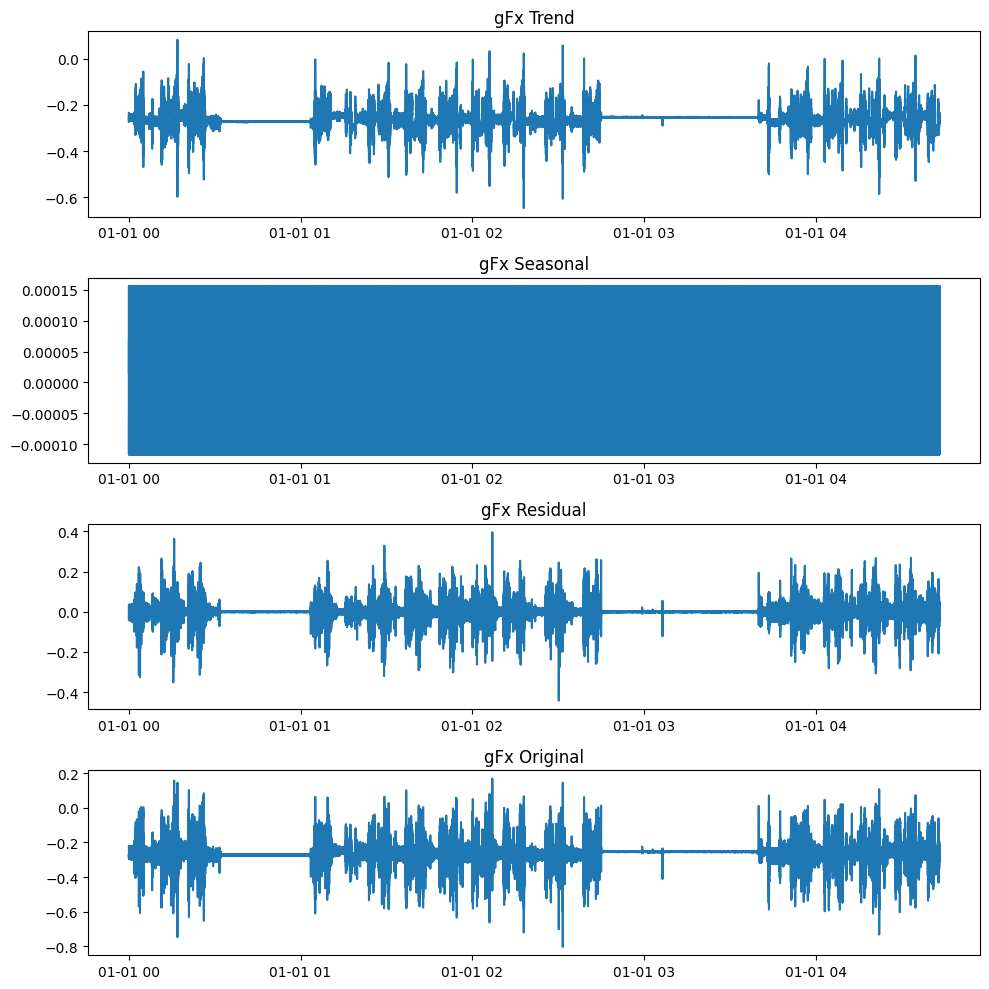

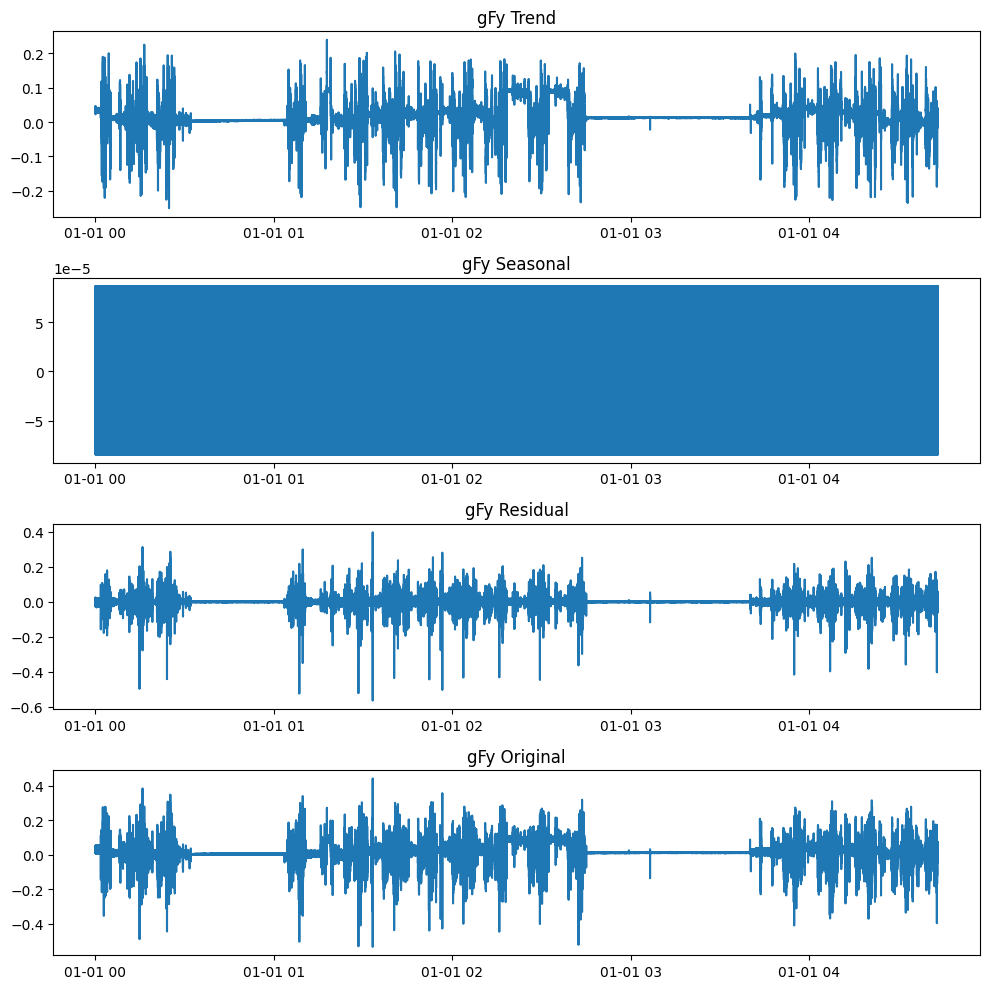

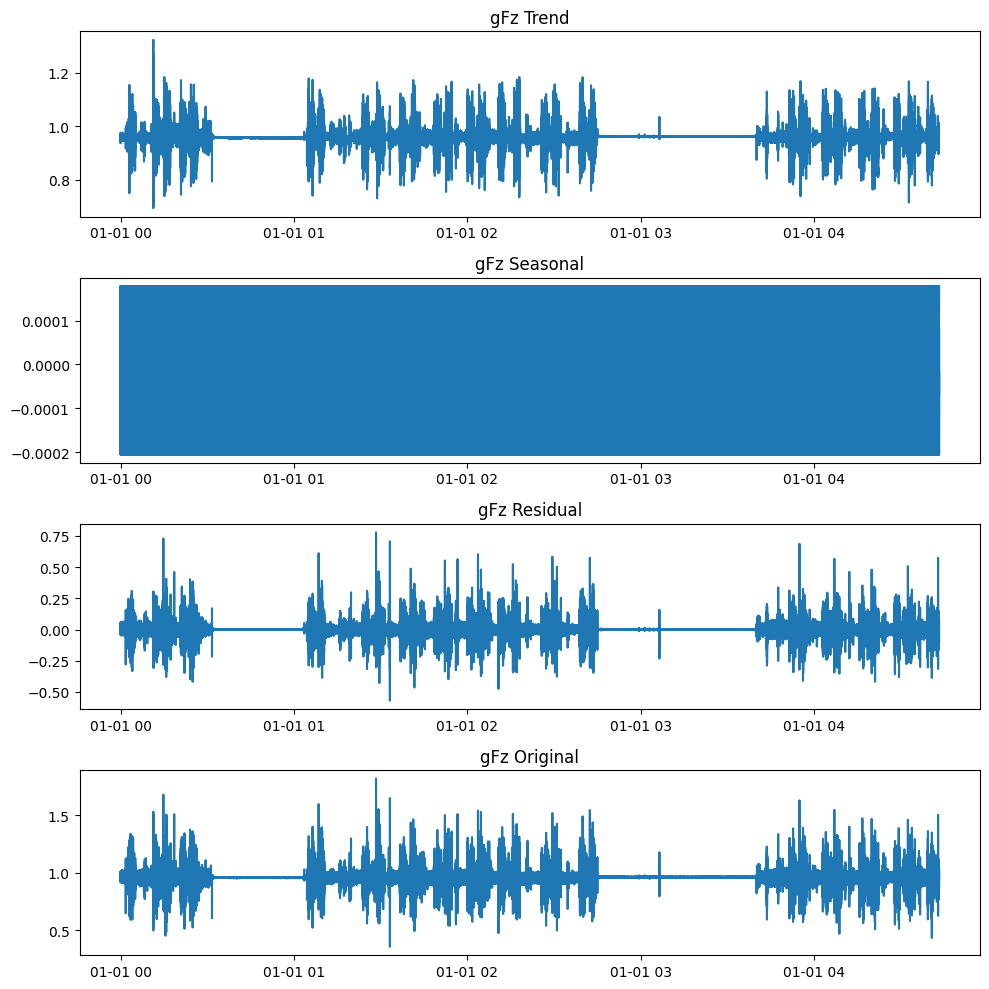

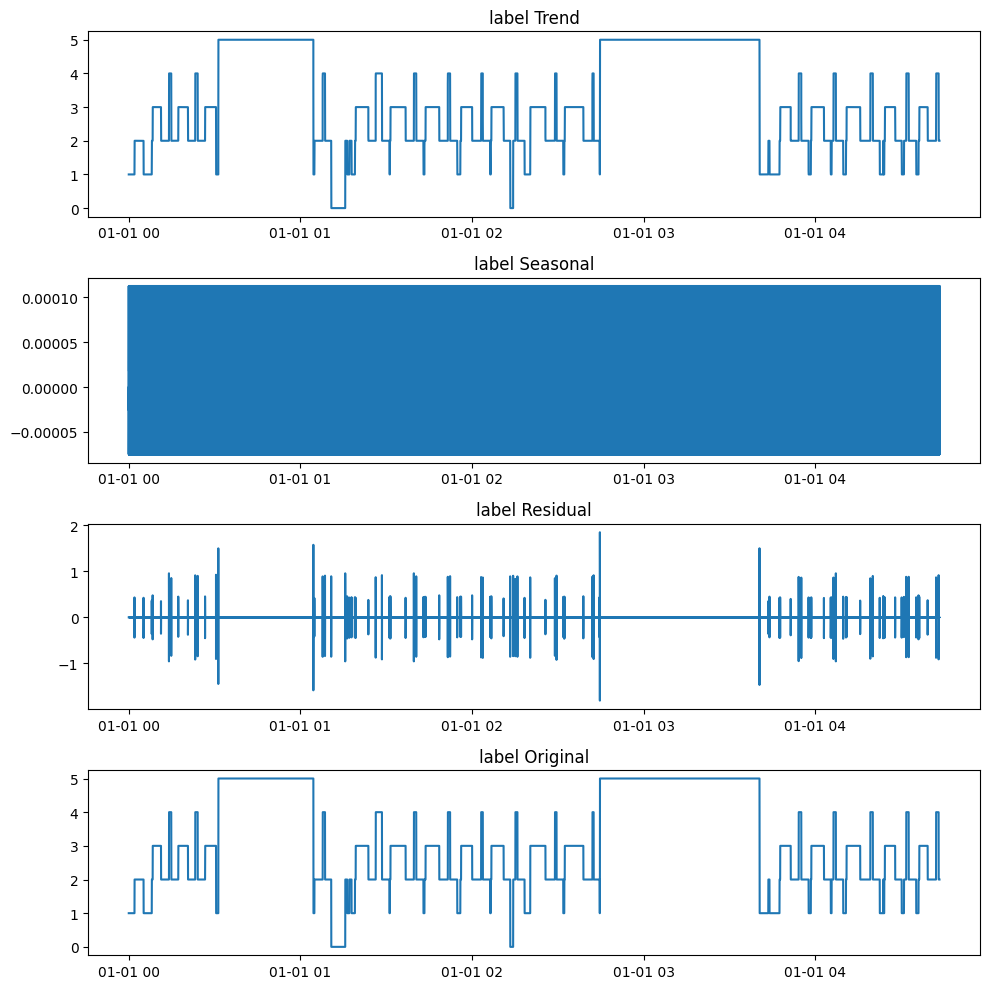

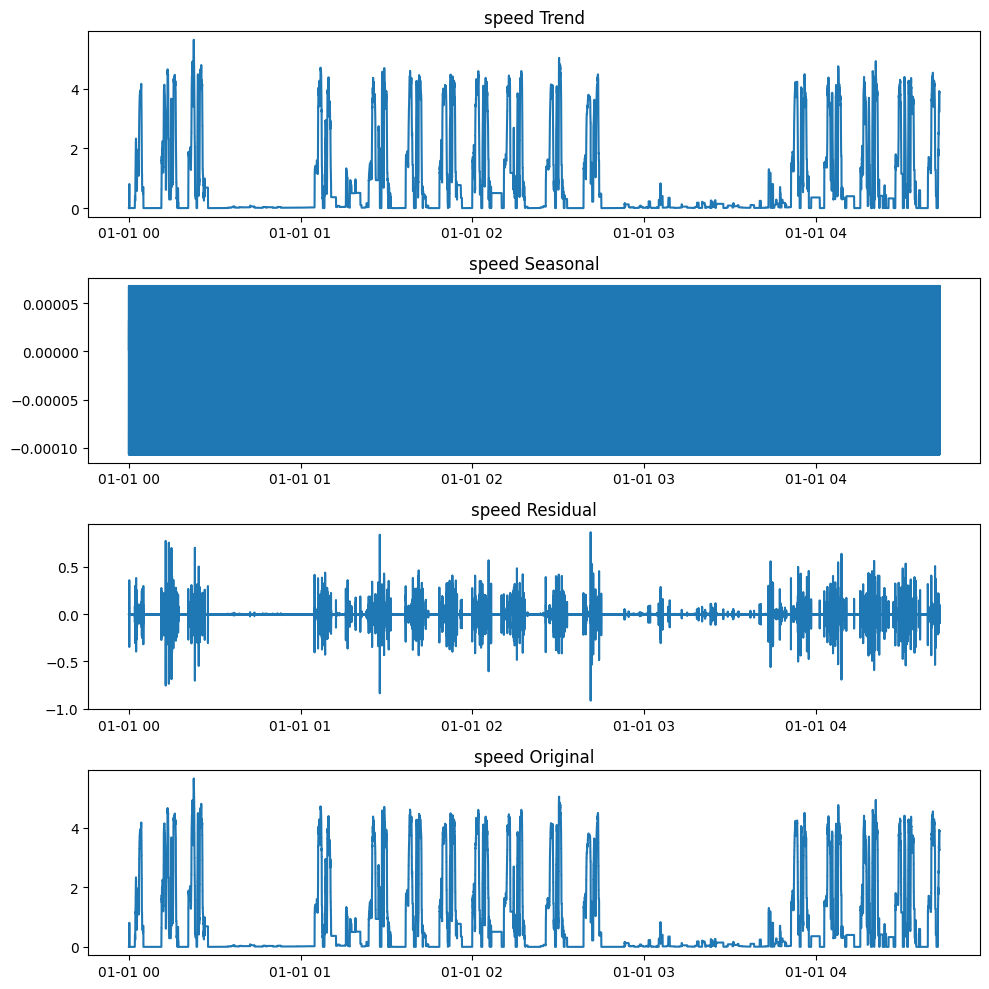

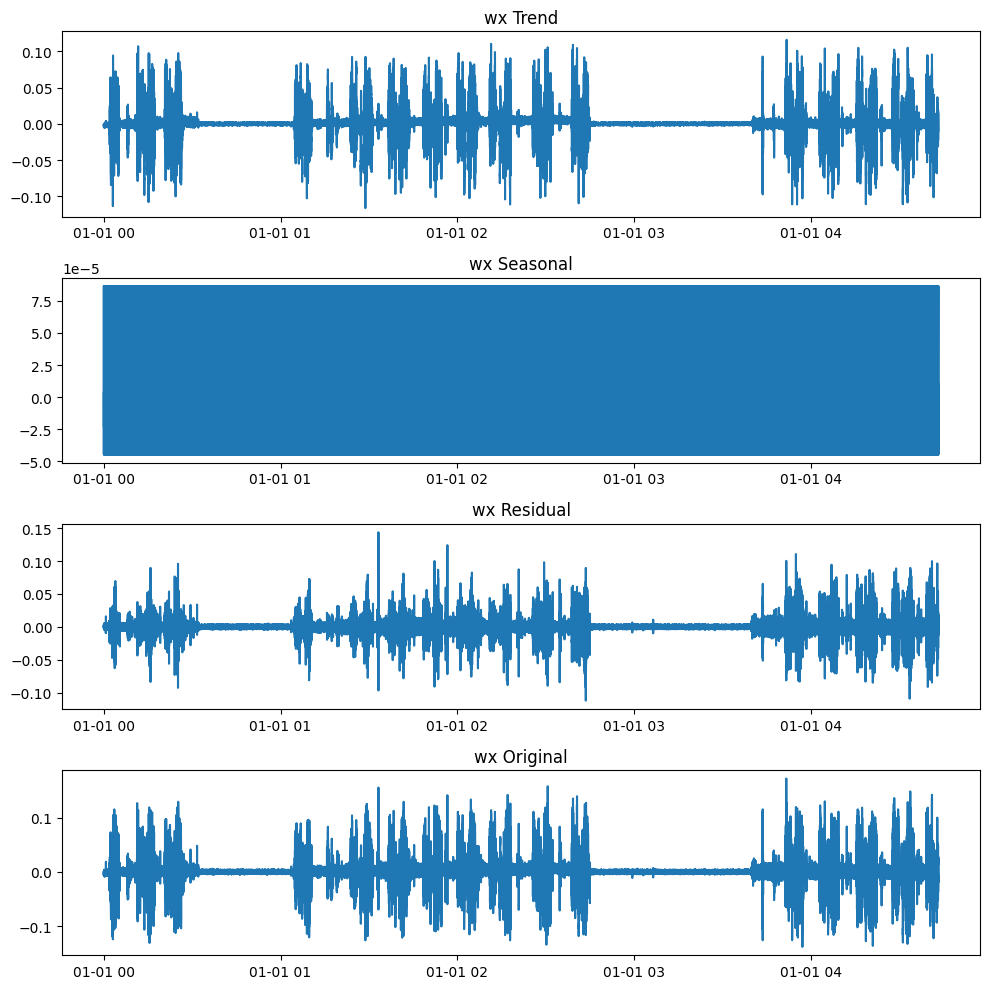

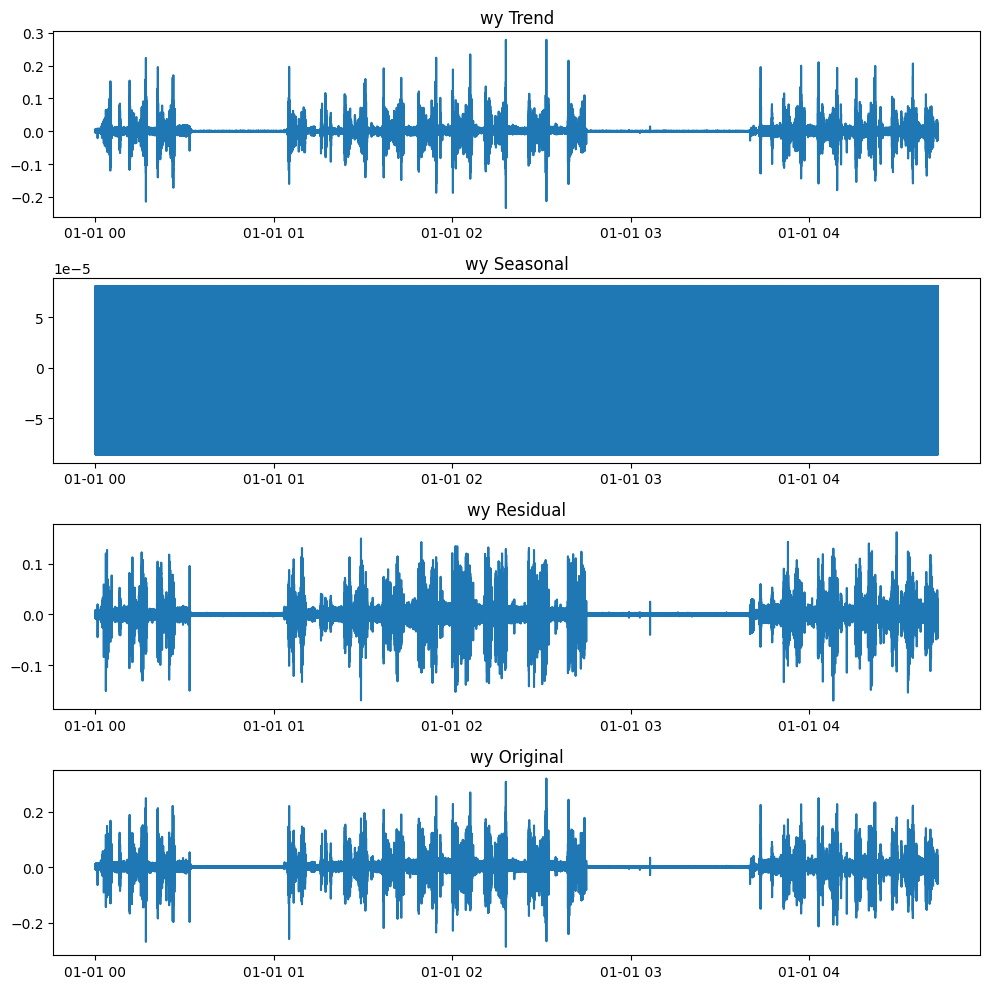

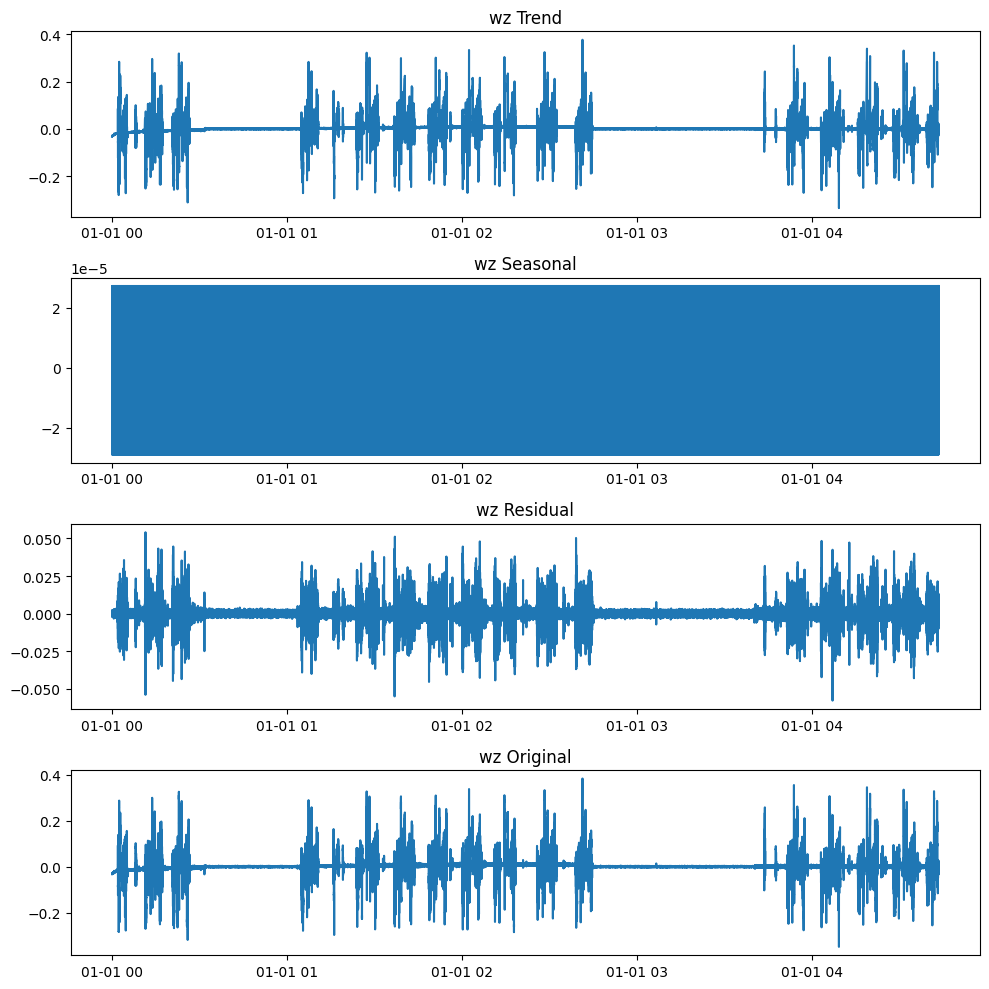

Save Finish


In [7]:
# Adjust period based on data for Decomposition
period = 24
# Plot width 
x_size = 10
# Plot height
y_size = 10
# Set option
# 1.HeatMap, 2.plot, 3.Decomposition, 4.All 
option = 4

# Set Start Function
Visualize_EDA(df, period, x_size, y_size, option)

## Check Statistical_Test

In [ ]:
# Check ADF Test
adf_test(df)


adf_test for column: gFx
ADF Statistic: -26.841632123401652
p-value: 0.0
Critical Values: {'1%': -3.4310064618089995, '5%': -2.8618301169543403, '10%': -2.5669244241183153}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: gFy
ADF Statistic: -25.826080620560354
p-value: 0.0
Critical Values: {'1%': -3.4310065936361585, '5%': -2.861830175207641, '10%': -2.5669244551266304}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: gFz
ADF Statistic: -23.84421385279615
p-value: 0.0
Critical Values: {'1%': -3.4310066595695945, '5%': -2.861830204343065, '10%': -2.5669244706354584}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: label
Column 'label' has constant value

In [ ]:
# Check KPSS Test
kpss_test(df)


kpss_test for column: gFx
KPSS Statistic: 0.7038318254513484
p-value: 0.013197106777150146
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: gFy
KPSS Statistic: 2.6380575937051445
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: gFz
KPSS Statistic: 0.536245262376789
p-value: 0.03350331928450697
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: label
Column 'label' has constant values and will be skipped.

kpss_

In [ ]:
# Check PP Test
pp_test(df)


pp_test for column: gFx

Phillips-Perron Test for column: gFx
Test Statistic: -66.14943613457953
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: gFy

Phillips-Perron Test for column: gFy
Test Statistic: -59.08049870402859
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: gFz

Phillips-Perron Test for column: gFz
Test Statistic: -52.42175615482451
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: label
Column 'label' has constant values and will be skipped.

pp_test for column: speed

Phillips-Perron Test for column: speed
Test Statistic: -7.260125315633697
p-value: 1.6900818040581298e-10
The series is stationary
-----

In [ ]:
# Check ljung box Test
ljung_box_test(df, lags=10)


Ljung-Box Test for column: gFx
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: gFy
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: gFz
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: label
p-value: nan
No autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: speed
p-value: 0.0
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: wx
p-value: 0.0
There is autocorrelation
--------

In [ ]:
# Check Arch Test
arch_test(df)


arch_test for column: gFx
ARCH Model Results:

Omega (Intercept): 2.33e-04
Alpha[1] (ARCH Term): 0.3834

Model Evaluation:
Log-Likelihood: 25546.66
AIC (Akaike Information Criterion): -51087.32
BIC (Bayesian Information Criterion): -51065.69

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is low, suggesting that past variances have a weaker effect on current volatility.
------------------------------------------------------------------------------------------------------------------

arch_test for column: gFy
ARCH Model Results:

Omega (Intercept): 6.48e-05
Alpha[1] (ARCH Term): 0.5000

Model Evaluation:
Log-Likelihood: 31185.09
AIC (Akaike Information Criterion): -62364.17
BIC (Bayesian Information Criterion): -62342.54

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is low, suggesting that past variances have a weaker effect on current volatility.
---------------------------------------

c:\Users\MACH-DE-28\anaconda3\envs\test\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
c:\Users\MACH-DE-28\anaconda3\envs\test\lib\site-packages\arch\univariate\base.py:765: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


In [ ]:
# Check VIF Test
vif_test(df)

Variable: gFx, VIF: 2.13, Interpretation: Low multicollinearity
Variable: gFy, VIF: 1.72, Interpretation: Low multicollinearity
Variable: gFz, VIF: 1.62, Interpretation: Low multicollinearity
Variable: label, VIF: 2547.09, Interpretation: High multicollinearity
Variable: speed, VIF: 1.03, Interpretation: Low multicollinearity
Variable: wx, VIF: 1.20, Interpretation: Low multicollinearity
Variable: wy, VIF: 1.20, Interpretation: Low multicollinearity
Variable: wz, VIF: 1.06, Interpretation: Low multicollinearity
